In [78]:

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    BaggingClassifier, 
    RandomForestClassifier, 
    ExtraTreesClassifier, 
    AdaBoostClassifier,
    StackingClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)

# to do PCA 
from sklearn.decomposition import PCA

# for cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

import sklearn.metrics as metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
# To tune a model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config

set_config(display='diagram')
from joblib import dump
from joblib import load


In [79]:
df = pd.read_csv('gefitinibTrain.tsv', sep='\t')

In [80]:
df.head()

,Gefitinib_response,type,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,...,rna_MAFIP,rna_CD24,rna_HLA-DRB3,rna_LOC389831,rna_MGC70870,rna_LOC100233156,rna_LOC389834,rna_LOC283788,rna_RNA5-8S5,rna_LOC102723780
Breast_SQ68,0,Breast,0,0,0,0,0,0,1,0,...,1.765641,3.610263,0.000000,0.144895,0.109381,0.000000,0.377070,0.743830,7.430427,0.379076
Breast_EI813,0,Breast,0,0,0,0,0,0,0,0,...,0.683720,1.901263,0.000000,1.973497,0.560144,0.763473,0.508316,1.166169,9.509599,1.445901
Breast_PV9,0,Breast,0,0,0,0,1,0,1,0,...,2.985080,4.125750,0.160901,1.316661,0.265797,1.167377,1.316250,1.320358,7.672418,0.230426
Breast_KY76,0,Breast,0,0,0,0,0,0,0,0,...,0.442882,0.320471,0.077141,3.301013,0.063881,0.323250,0.515944,0.272920,4.727648,0.222489
Breast_EPQV2,0,Breast,0,0,0,1,0,1,0,0,...,3.361561,7.317910,0.071225,2.624524,0.108735,1.402040,1.296005,1.550906,10.491553,2.474496


In [81]:
df.columns = df.columns.str.replace('.', '-')

C:\Users\madhu\AppData\Local\Temp/ipykernel_28308/2875486294.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '-')


In [82]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df.head()

,Gefitinib_response,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,mut_MACF1,...,rna_RNA5-8S5,rna_LOC102723780,type_Bowel,type_BrainCNS,type_Breast,type_Kidney,type_Lung,type_Ovary,type_Prostate,type_Skin
Breast_SQ68,0,0,0,0,0,0,0,1,0,0,...,7.430427,0.379076,0,0,1,0,0,0,0,0
Breast_EI813,0,0,0,0,0,0,0,0,0,0,...,9.509599,1.445901,0,0,1,0,0,0,0,0
Breast_PV9,0,0,0,0,0,1,0,1,0,0,...,7.672418,0.230426,0,0,1,0,0,0,0,0
Breast_KY76,0,0,0,0,0,0,0,0,0,0,...,4.727648,0.222489,0,0,1,0,0,0,0,0
Breast_EPQV2,0,0,0,0,1,0,1,0,0,0,...,10.491553,2.474496,0,0,1,0,0,0,0,0


In [83]:
# variances = df.var()

# # Get column indices where variance is zero
# zero_variance_cols = variances[variances == 0].index

In [84]:
# # Drop columns with zero variance
# df = df.drop(columns=zero_variance_cols)
# df.shape

# SPLITTING 

In [85]:
X = df.drop('Gefitinib_response', axis = 1)
y = df['Gefitinib_response']

In [86]:
y.value_counts()

0    32
1    16
Name: Gefitinib_response, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify = y)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 38
Number of rows in test data = 10


In [88]:
y_test.value_counts()

0    7
1    3
Name: Gefitinib_response, dtype: int64

# SCALING

In [89]:
scaler = MinMaxScaler()
 
# Scale the Data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# OVER-SAMPLING

In [90]:
# Assign y_train as a new column to X_train DataFrame
X_train['TargetColumn'] = y_train.values

In [91]:
#weights = [10 if TargetColumn > 0.5 else 1 for TargetColumn in X_train.TargetColumn] #weights not needed since random sampling
sample = X_train.sample(700, replace = True)
sample.head()

,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,mut_MACF1,mut_CDCP2,...,rna_LOC102723780,type_Bowel,type_BrainCNS,type_Breast,type_Kidney,type_Lung,type_Ovary,type_Prostate,type_Skin,TargetColumn
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
14,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.195150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.173698,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.341704,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [92]:
sample['TargetColumn'].value_counts()

0    472
1    228
Name: TargetColumn, dtype: int64

In [93]:
# Oversample the minority class by duplicating samples
oversampled = pd.concat([X_train, sample], axis=0, ignore_index=True)
oversampled.shape

(738, 15997)

In [94]:
# Shuffle the DataFrame using sample() method
shuffled_df = oversampled.sample(frac=1, random_state=42)  # frac=1 shuffles all rows, random_state for reproducibility

# Reset the index if needed
shuffled_df.reset_index(drop=True, inplace=True)

In [95]:
X_train = shuffled_df.drop('TargetColumn', axis = 1)
y_train = shuffled_df['TargetColumn'].values

# MODELLING PART

# Lasso Logistic Regression

In [96]:
# Create a Logistic Regression model with L1 (Lasso) regularization
lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)  # Adjust C for regularization strength

# Fit the model on the training data
lasso_logreg.fit(X_train, y_train)

# Save the trained model to a file
dump(lasso_logreg, 'gefit_lasso.joblib')

# Predict on the train set
y_pred_train = lasso_logreg.predict(X_train)

# Predict on the test set
y_pred = lasso_logreg.predict(X_test)

print("Accuracy on train:", accuracy_score(y_train, y_pred_train))
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test:", accuracy)

Accuracy on train: 1.0
Accuracy on test: 0.7


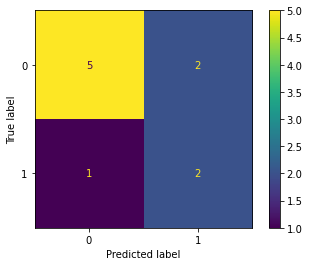

In [97]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [98]:
# Retrieve coefficients and intercept
coefficients = lasso_logreg.coef_
intercept = lasso_logreg.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[0. 0. 0. ... 0. 0. 0.]]
Intercept: [0.]


In [99]:
# Retrieve coefficients greater than zero and their column indices
coefficients = lasso_logreg.coef_[0]  # Assuming binary classification, extracting coefficients for the first class

non_zero_coefficients = [(index, coef) for index, coef in enumerate(coefficients) if coef != 0]

sorted_coefficients = sorted(non_zero_coefficients, key=lambda x: abs(x[1]), reverse=True)

print("Coefficients:")
for index, coef in sorted_coefficients:
    print(f"{X_train.columns[index]}: {coef}")

Coefficients:
mut_OR5L2: -1.1956922877007077
rna_SCIN: 1.156686586625371
rna_LINC00648: 0.9494892569230897
rna_TENM2: -0.8785591471654692
mut_CHI3L2: -0.8329292267451966
rna_CH17-360D5-1: 0.8328431768322923
mut_LRRIQ1: -0.8079924761303348
rna_ROR2: -0.7375650257554137
mut_LRP1B: -0.7216816526573863
rna_MX2: -0.6807129049538805
rna_SLC16A4: 0.6737898570575769
rna_ISLR: 0.6536663500933635
mut_OR52D1: 0.6444375255485664
rna_UGT2B7: 0.6420306325996703
rna_LOC101928837: -0.639358114857767
rna_DDO: 0.624480581321085
rna_FAM19A3: 0.6236860573198112
mut_LRRC7: -0.5946351160126201
mut_DNAH7: 0.565389284700062
rna_GPRC5B: 0.5603024636845633
rna_RNU11: -0.536088393603605
rna_ZNF585B: -0.5217416851611737
rna_PCDHGB5: 0.5021405625350461
mut_XIRP1: -0.4977748480136177
mut_SPTBN1: 0.4916194500832515
rna_NPY4R: 0.4850686919120528
rna_PADI2: 0.4740802928852371
rna_SERPINA9: 0.45755483388237145
mut_FN1: -0.45225096329757813
mut_SCRN3: -0.44423995151528173
rna_ALDH1A3: 0.4362536473528319
rna_SNORA74A: -0

In [100]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
cross_val_score(lasso_logreg, X_train, y_train, cv=cv, scoring='accuracy',)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [101]:
#using laeve one out cross validation
#cv = KFold(n_splits=38, shuffle=True, random_state=4)
#cross_val_score(lasso_logreg, X_train, y_train, cv=cv, scoring='accuracy',)

In [102]:
columns = []
for index, coef in non_zero_coefficients:
    columns.append(X_train.columns[index])

columns

['mut_CSMD2',
 'mut_LRRC7',
 'mut_CHI3L2',
 'mut_SPTBN1',
 'mut_ALMS1',
 'mut_LRP1B',
 'mut_SCRN3',
 'mut_DNAH7',
 'mut_FN1',
 'mut_COL4A4',
 'mut_XIRP1',
 'mut_WWTR1',
 'mut_FAT4',
 'mut_SYNE1',
 'mut_KAT6B',
 'mut_OR52D1',
 'mut_OR5L2',
 'mut_LRRIQ1',
 'mut_SBNO1',
 'mut_PCDH9',
 'mut_AKAP13',
 'mut_SPTBN4',
 'mut_EP300',
 'rna_PADI2',
 'rna_PNRC2',
 'rna_RNU11',
 'rna_AK2',
 'rna_ZC3H12A',
 'rna_COL9A2',
 'rna_FOXO6',
 'rna_SLC16A4',
 'rna_FAM19A3',
 'rna_KRTCAP2',
 'rna_HSPA6',
 'rna_SYT14',
 'rna_WNT9A',
 'rna_NCK2',
 'rna_ACVR2A',
 'rna_TNFAIP6',
 'rna_CERS6-AS1',
 'rna_IGFBP2',
 'rna_BRK1',
 'rna_FYCO1',
 'rna_TAGLN3',
 'rna_B4GALT4-AS1',
 'rna_NLGN1',
 'rna_CC2D2A',
 'rna_FGFBP1',
 'rna_SNORA26',
 'rna_UGT2B7',
 'rna_NPFFR2',
 'rna_PLAC8',
 'rna_GPAT3',
 'rna_SPP1',
 'rna_CMBL',
 'rna_ANKH',
 'rna_EPB41L4A-AS1',
 'rna_CAMLG',
 'rna_EGR1',
 'rna_HSPA9',
 'rna_SNORA74A',
 'rna_IGIP',
 'rna_PURA',
 'rna_ANKHD1',
 'rna_ZMAT2',
 'rna_TAF7',
 'rna_PCDHGB5',
 'rna_RBM22',
 'rna_SAP30L

In [103]:
len(columns)

160

In [104]:
strings_to_check = ['type_Breast', 'type_BrainCNS', 'type_Bowel', 'type_Blood', 'type_Skin', 'type_Lung', 'type_Ovary', 'type_Prostate', 'type_Kidney']
present_strings = [string for string in strings_to_check if any(string in name for name in columns)]

# Print the result
print("Strings present in the array names:", present_strings)

Strings present in the array names: []
